<a href="https://colab.research.google.com/github/Barneybean/comment_objetivity_analysis/blob/master/William_BAX452_Discussion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from textblob import TextBlob

df=pd.read_csv('https://raw.githubusercontent.com/Barneybean/comment_objetivity_analysis/master/googleplaystore_user_reviews.csv') 
reviews = df["Translated_Review"].astype(str)
print(reviews.head())


0    I like eat delicious food. That's I'm cooking ...
1      This help eating healthy exercise regular basis
2                                                  nan
3           Works great especially going grocery store
4                                         Best idea us
Name: Translated_Review, dtype: object


In [4]:
#analyze sentiments on reviews comments

print("*****this will take a minute********")

# The polarity score is a float within the range [-1.0, 1.0].
# The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

def sentiment_analysis(row):
  text = TextBlob(row)
  subjectivity_score = text.sentiment.subjectivity
  return(subjectivity_score)
  
def categorize(score):
  if score > 0.5:
    return "Subjective"
  elif score == 0:
    return "NaN"
  else:
    return "Objective"

df["My_Subjectivity_score"] = reviews.apply(sentiment_analysis)
df["Subjectivity_category"] = df["My_Subjectivity_score"].apply(categorize)

print(df.head())



*****this will take a minute********
                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  \
0  Positive                1.00                0.533333   
1  Positive                0.25                0.288462   
2       NaN                 NaN                     NaN   
3  Positive                0.40                0.875000   
4  Positive                1.00                0.300000   

   My_Subjectivity_score Subjectivity_category  
0               0.533333            Subjective  
1               0.288462           

In [5]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,My_Subjectivity_score,Subjectivity_category
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.533333,Subjective
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.288462,Objective
2,10 Best Foods for You,NaN,NaN,NaN,NaN,0.000000,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.875000,Subjective
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.300000,Objective


       Count               label
0  61.314113  Positive_Sentiment
1  53.123475  Negative_Sentiment


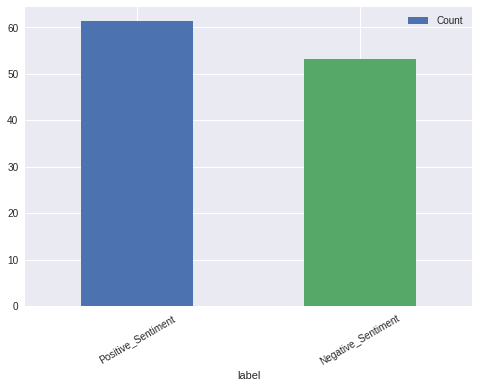

In [6]:
#Analyze whether positive comments are more subjective than those in negative comments

positive_and_subjective = df["Sentiment"][(df["Sentiment"]=="Positive") & (df["Subjectivity_category"]=="Subjective")].count()
positive_and_objective = df["Sentiment"][(df["Sentiment"]=="Positive") & (df["Subjectivity_category"]=="Objective")].count()
negative_and_subjective = df["Sentiment"][(df["Sentiment"]=="Negative") & (df["Subjectivity_category"]=="Subjective")].count()
negative_and_objective = df["Sentiment"][(df["Sentiment"]=="Negative") & (df["Subjectivity_category"]=="Objective")].count()

subjective_in_positive = positive_and_subjective/(positive_and_subjective+positive_and_objective)
subjective_in_negative = negative_and_subjective/(negative_and_subjective+negative_and_objective)

data=[subjective_in_positive,
      subjective_in_negative]
data = list(map(lambda x: (x*100), data))
y_labels = list(map(lambda x: "{:,.2%}".format(x), data))

data = pd.DataFrame({"label": ["Positive_Sentiment", "Negative_Sentiment"], "Count":data})
print(data)

ax=data.plot.bar(x="label", y="Count", rot=30)
# ax.set_yticklabels(y_labels)

#Positive reviews are more subjective than negative reviews 61% vs 53%


## Discussion #1

* 10 Points Total
  * 5 points for modifying this colab notebook and making it does something different
  * 5 points for responding to at least one other person's changes.
  
**Grading Criteria**

* Creativity
* Complexity
* Relevant
* Software Quality
* Did you test your link in "incognito mode" so other can open it?

### Installing textblob

In [0]:
!pip -q install -U textblob

### Making a Pandas DataFrame from scratch

In [0]:
import pandas as pd
from textblob import TextBlob


In [0]:
df = pd.DataFrame(
  {"SentimentRaw": ["I am very Angry",
                    "We are very Happy",
                    "It is raining in Seattle"]}
)
print(df)

               SentimentRaw
0           I am very Angry
1         We are very Happy
2  It is raining in Seattle


### Creating an Apply function

In [0]:
def create_sentiment(row):
  "This operates on a row of a Pandas DataFrame and performs an action"
  
  result = TextBlob(row)
  spanish_version = result.translate(to="es")
  print(f"Raw phrase: {row}, spanish version: {spanish_version}")
  return spanish_version
 
  

### Apply to DataFrame

In [0]:
df["SpanishSentimentRaw"] = df["SentimentRaw"].apply(create_sentiment)

Raw phrase: I am very Angry, spanish version: Estoy muy furioso
Raw phrase: We are very Happy, spanish version: Estamos muy felices
Raw phrase: It is raining in Seattle, spanish version: Esta lloviendo en seattle
